In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from bioblp import train
from pykeen.pipeline import pipeline
from pykeen.models import TransE
import pandas as pd 
from pathlib import Path
import toml

/home/jovyan/.conda/envs/bioblp-env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from bioblp.data import COL_EDGE, COL_SOURCE, COL_TARGET
from bioblp.data import load_splits

In [11]:
DATA_DIR = Path('../data')
SHARED_DATA_DIR = Path('/home/jovyan/workbench-shared-folder/bioblp/')
dpi_benchmark_path = SHARED_DATA_DIR.joinpath('data/benchmarks/dpi_fda.tsv')
biokg_train_path = SHARED_DATA_DIR.joinpath('data/raw/biokg_bm_splits/biokg.links-train.csv')

## Load Training graph and benchmark DPI datasets

In [10]:
### Load biokg training graph

In [13]:
train_df = pd.read_csv(biokg_train_path, sep='\t', names=[COL_SOURCE, COL_EDGE, COL_TARGET])
train_df.edg.value_counts()

DDI                            906535
PROTEIN_PATHWAY_ASSOCIATION    205871
PPI                             93643
PROTEIN_DISEASE_ASSOCIATION     89804
MEMBER_OF_COMPLEX               71035
DRUG_DISEASE_ASSOCIATION        53426
COMPLEX_IN_PATHWAY              19615
COMPLEX_TOP_LEVEL_PATHWAY       12488
DPI                              7860
DRUG_TARGET                      5714
DISEASE_GENETIC_DISORDER         4339
DRUG_PATHWAY_ASSOCIATION         4244
RELATED_GENETIC_DISORDER         3450
DISEASE_PATHWAY_ASSOCIATION      2945
DRUG_ENZYME                       528
DRUG_TRANSPORTER                  222
DRUG_CARRIER                       90
Name: edg, dtype: int64

In [ ]:
train_df[train_df[COL_EDGE].isin(['DPI'])].head(3)

,src,edg,tgt
18691,DB00001,DPI,P00734
19001,DB00002,DPI,O75015
19002,DB00002,DPI,P00533


### Load benchmark

In [ ]:
dpi_benchmark_path = DATA_DIR.joinpath('benchmarks/dpi_fda.tsv')

In [ ]:
dpi_bm = pd.read_csv(dpi_benchmark_path, sep='\t', names=[COL_SOURCE, COL_EDGE, COL_TARGET])
dpi_bm.head(3)

,src,edg,tgt
0,DB01079,DPI,Q13639
1,DB00114,DPI,P20711
2,DB01158,DPI,P13637


In [14]:
# should be done on union of biokg train, test, valid
dpi_overlap_df = train_df[train_df["edg"]=="DPI"].join(dpi_bm, how="inner", lsuffix="biokg", rsuffix="fda")
len(dpi_overlap_df)

3948

In [16]:
dpi_bm.edg.value_counts()

DPI    19161
Name: edg, dtype: int64

In [15]:
dpi_drugs_unique = list(dpi_bm.src.unique())
dpi_prots_unique = list(dpi_bm.tgt.unique())
len(dpi_drugs_unique), len(dpi_prots_unique)

(2286, 2705)

In [16]:
dpis_by_drug = dpi_bm.groupby(by="src").agg(interacting_prots=("tgt",'count')).reset_index()
dpis_by_drug.describe()

,interacting_prots
count,2286.000000
mean,8.381890
std,12.922181
min,1.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,307.000000


In [17]:
dpis_by_prot = dpi_bm.groupby(by="tgt").agg(interacting_drugs=("src",'count')).reset_index()
dpis_by_prot.describe()

,interacting_drugs
count,2705.000000
mean,7.083549
std,26.525646
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,783.000000


array([[<AxesSubplot:title={'center':'interacting_drugs'}>]], dtype=object)

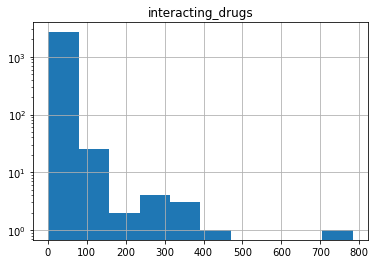

In [18]:
dpis_by_prot.hist('interacting_drugs', log=True)

array([[<AxesSubplot:title={'center':'interacting_prots'}>]], dtype=object)

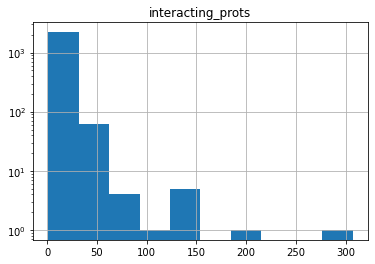

In [19]:
dpis_by_drug.hist('interacting_prots', log=True)